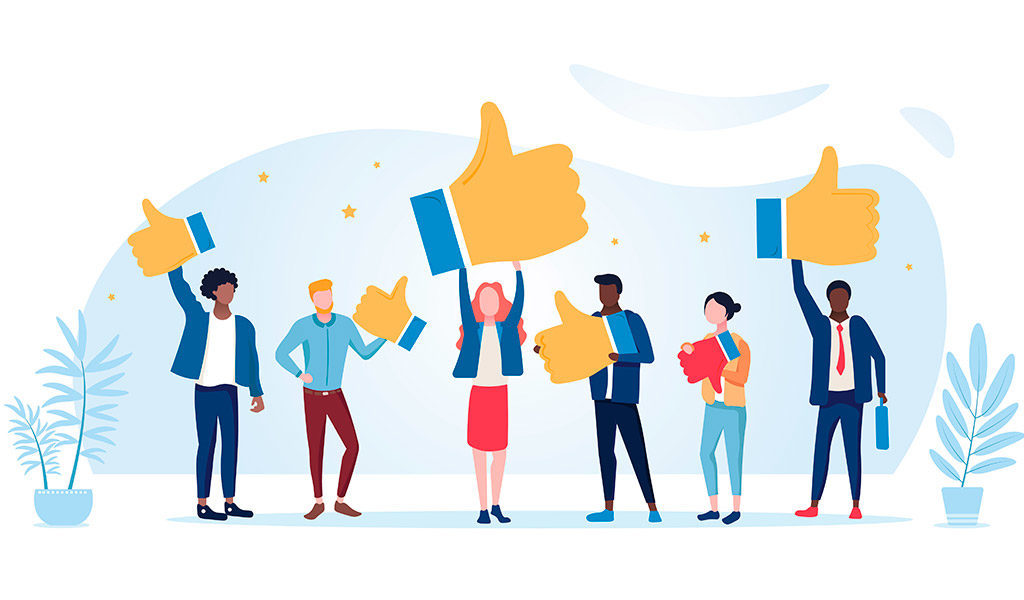

# Shop Customer EDA

## By Ibuodinma Somtochukwu I

## Description
>Shop Customer Data a dataset of customers of an ideal shop. The information is supposedly gleaned from the membership cards.

 Dataset consists of 2000 records and 8 columns:

* Customer ID
* Gender
* Age
* Annual Income
* Spending Score - Score assigned by the shop, based on customer behavior and spending nature
* Profession
* Work Experience - in years
* Family Size

## Objectives
* Explore distributions of numeric columns using histograms etc.
* Explore relationship between columns using scatter plots, bar charts etc.
* Derive interesting insights from the exploratory analysis



In [56]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [33]:
df_customer = pd.read_csv('Customers.csv')#reading the csv file into a dataframe

In [34]:
df_customer.head(5) # assessing the dataset 

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Assessing and Cleaning the dataset

In [35]:
df_customer.info()# checking the basic property of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


###  Observations

* The column *Profession* has incomplete data
* 2000 rows and 18 columns
* The numerical data include CustomerID, Annual Income ($), Spending Score (1-100), Work Experience, Family Size
* For ease of evaluation we need to modify the names of the columns eg using underscore to separate the names that comprise two words and removing brackets and dollars sign which are recognized symbols in python


In [36]:
df_customer.describe()# basic descriptive stats of the variables

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [37]:
df_customer.columns= df_customer.columns.str.replace(' ', '_')# replacing spaces in the column names with underscores

Dealing with missing values in the *Profession* column

The missing values contain significant data in other columns, hence should not be dropped

We replace 'nan' with 'Not Available'

In [38]:
df_customer[df_customer.Profession.isna()].head()# the missing values

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100),Profession,Work_Experience,Family_Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7


In [39]:
df_customer.Profession= df_customer.Profession.fillna('Not Available')#filling the nan with Not Available


In [40]:
df_customer.Profession.unique()#Checking for the data

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Not Available'],
      dtype=object)

In [41]:
df_customer.columns= df_customer.columns.str.replace('(_\(\$\))', '')#removing the dollar sign and the brackets


In [42]:
df_customer.columns= df_customer.columns.str.replace('(_\(1-100\))', '')#removing the brackets

In [43]:
df_customer.head()# checking for the applied changes

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [44]:
#summary Statistics of the Numerical Columns
df_customer.describe()[['Family_Size','Age','Annual_Income','Spending_Score','Work_Experience']]

,Family_Size,Age,Annual_Income,Spending_Score,Work_Experience
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.768500,48.960000,110731.821500,50.962500,4.102500
std,1.970749,28.429747,45739.536688,27.934661,3.922204
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,74572.000000,28.000000,1.000000
50%,4.000000,48.000000,110045.000000,50.000000,3.000000
75%,5.000000,73.000000,149092.750000,75.000000,7.000000
max,9.000000,99.000000,189974.000000,100.000000,17.000000


## Distributions of values  of the Numeric Columns

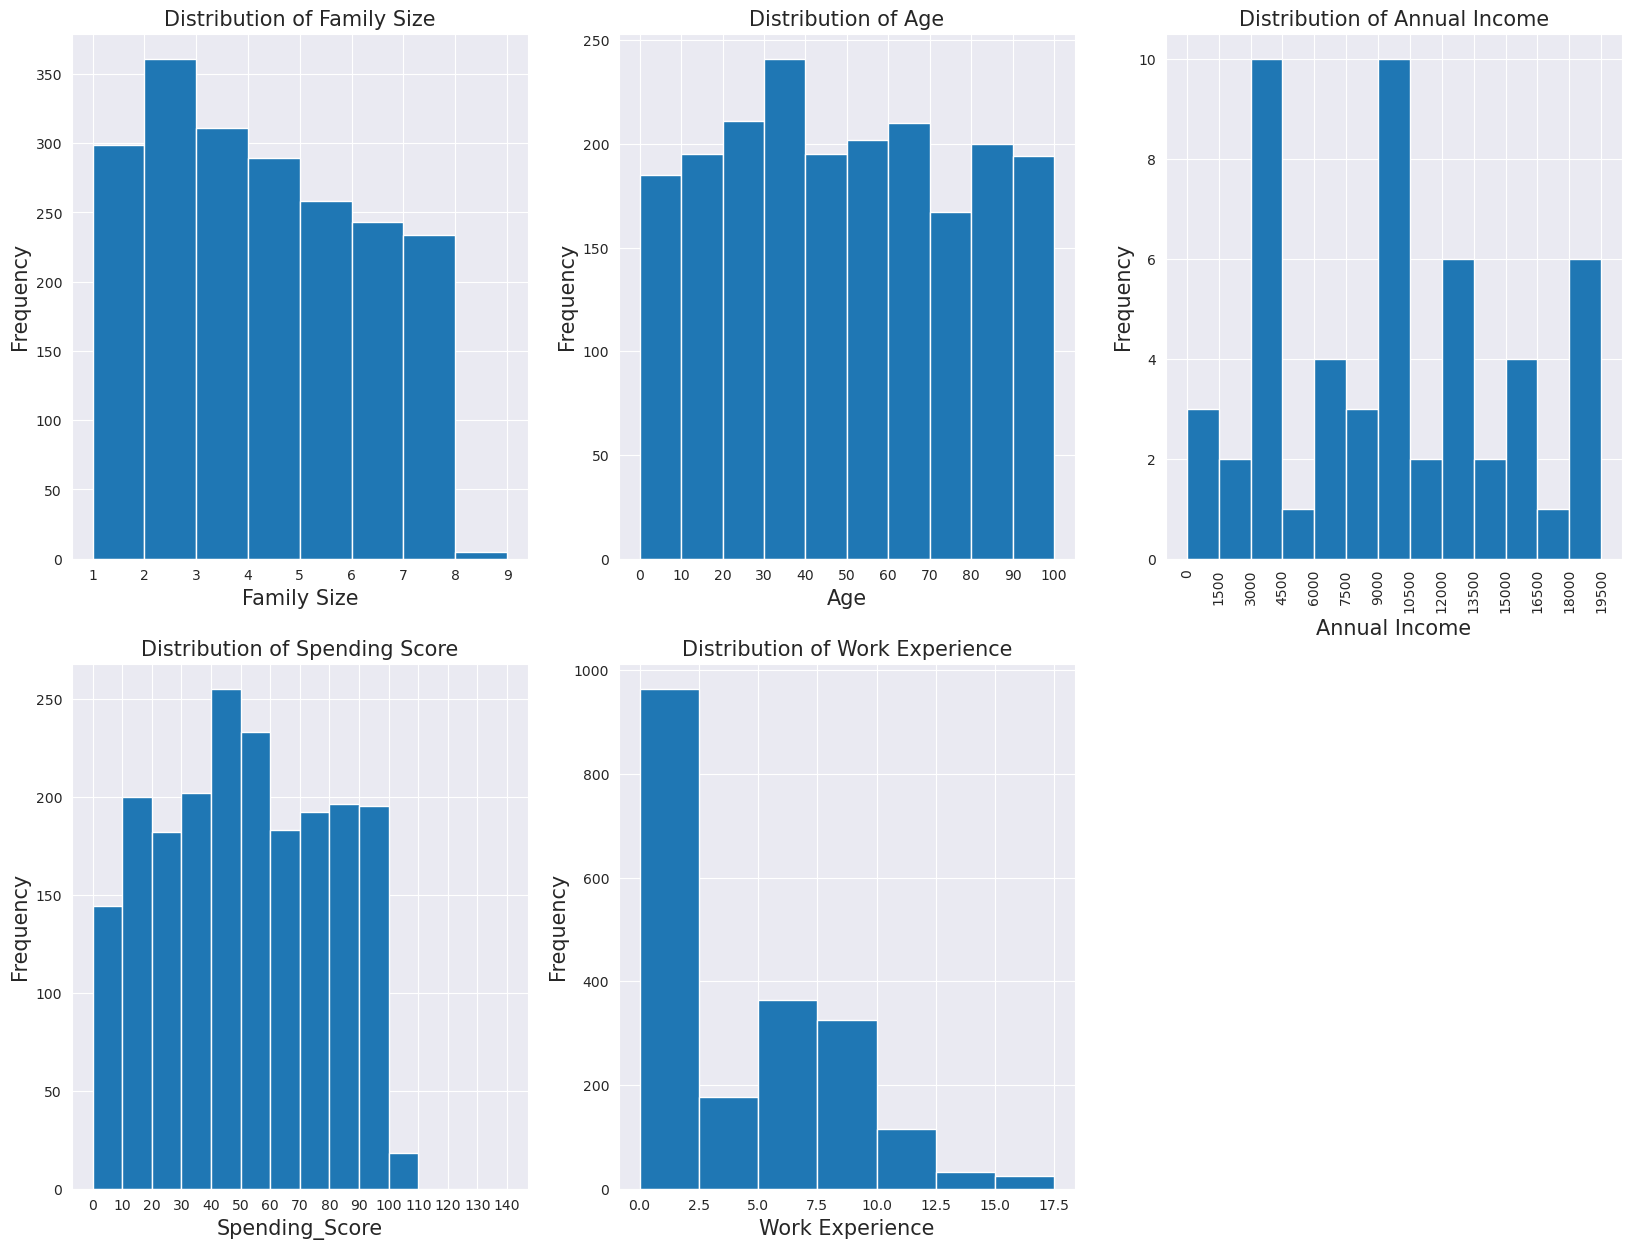

In [45]:
sb.set_style('darkgrid')
plt.figure(figsize=(20,15))
#plotting distribution of Family size
plt.subplot(2,3,1)
bins= np.arange(1,10,1);
plt.hist(data=df_customer, x= 'Family_Size',bins=bins);#using matplotlib hist()function
plt.xlabel('Family Size',fontsize=15);
plt.ylabel('Frequency',fontsize=15);
plt.title('Distribution of Family Size',fontsize=15);
plt.xticks(np.arange(1,10,1));

#plotting distribution of Age
plt.subplot(2,3,2)
bins= np.arange(0,110,10);
plt.hist(data=df_customer, x= 'Age',bins=bins);#using matplotlib hist()function
plt.xlabel('Age',fontsize=15);
plt.ylabel('Frequency',fontsize=15);
plt.title('Distribution of Age',fontsize=15);
plt.xticks(np.arange(0,110,10));

#plotting distribution of Annual income
plt.subplot(2,3,3)
bins= np.arange(0,20000,1500);
plt.hist(data=df_customer, x= 'Annual_Income',bins=bins);#using matplotlib hist()function
plt.xlabel('Annual Income',fontsize=15);
plt.ylabel('Frequency',fontsize=15);
plt.title('Distribution of Annual Income',fontsize=15);
plt.xticks(np.arange(0,20000,1500),rotation= 90);

#plotting distribution of Spending score 
plt.subplot(2,3,4)
bins= np.arange(0,150,10);
plt.hist(data=df_customer, x= 'Spending_Score',bins=bins);#using matplotlib hist()function
plt.xlabel('Spending_Score',fontsize=15);
plt.ylabel('Frequency',fontsize=15);
plt.title('Distribution of Spending Score',fontsize=15);
plt.xticks(np.arange(0,150,10));



#plotting distribution of Work Experience
plt.subplot(2,3,5)
bins= np.arange(0,20,2.5);
plt.hist(data=df_customer, x= 'Work_Experience',bins=bins);#using matplotlib hist()function
plt.xlabel('Work Experience',fontsize=15);
plt.ylabel('Frequency',fontsize=15);
plt.title('Distribution of Work Experience',fontsize=15);
plt.xticks(np.arange(0,20,2.5));


* More families have 1-5 members
* Most customers are within the ages 30 and 40
* Most customers earn between 3000 and 4500, 9000 and 10500
* The highest spending scores lie between 40 and 50
* The most work experiences lie below 3 years

## Distributions of values  of the Categorical Columns

In [46]:
df_customer.Profession.value_counts()# checking the number of the professions represented

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Not Available     35
Name: Profession, dtype: int64

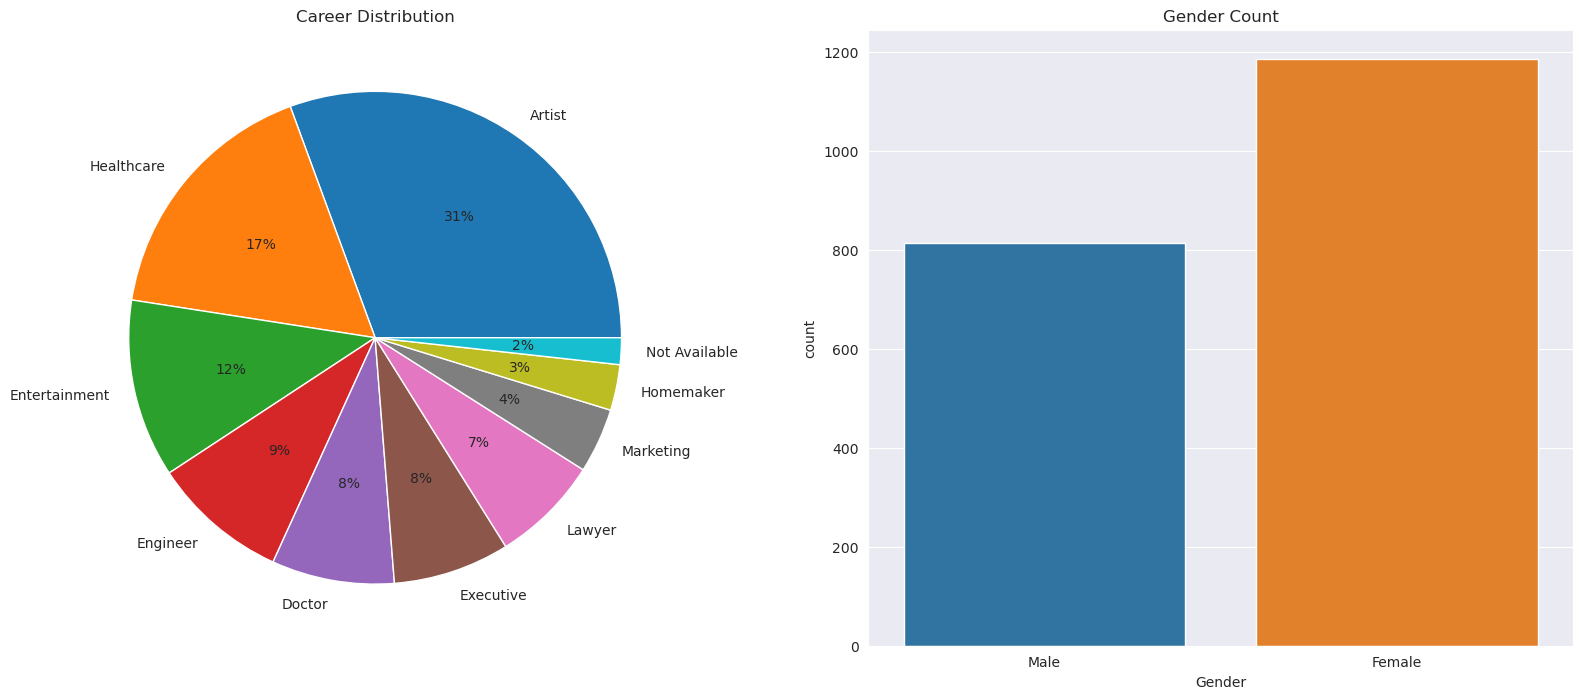

In [47]:
plt.figure(figsize=(20,8));# creating the figure size
plt.subplot(1,2,1);
profession_count = df_customer.Profession.value_counts() # counting the values of profession column
label= ['Artist', 'Healthcare', 'Entertainment', 'Engineer','Doctor','Executive',
        'Lawyer','Marketing','Homemaker','Not Available']
plt.pie(profession_count, labels=label, autopct='%1.0f%%');# plotting a pie chart using pie function
plt.title('Career Distribution'); # adding title

plt.subplot(1,2,2); # creating the figure size
sb.countplot(data=df_customer,x='Gender');# using seaborn countplot

plt.title('Gender Count'); # adding title

> Most of the customers are artists followed by health care  and entertainment practitioners.

> The number of female customers are more than their male counterpart

## Relationships Between Variables

### <u>Age vs Annual_Income</u>

In [48]:
df_customer.Age.describe()# summary statistics of Age variable

count    2000.000000
mean       48.960000
std        28.429747
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64

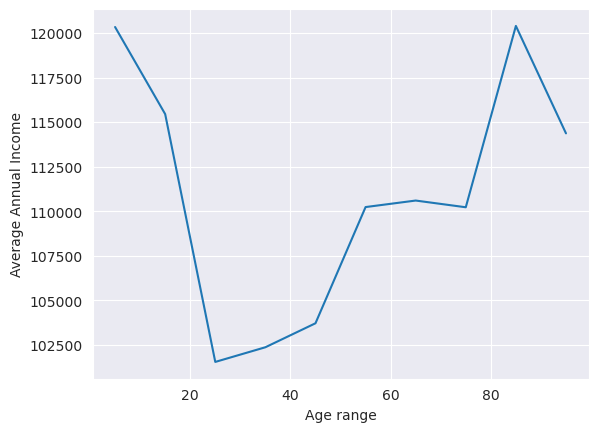

In [49]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0, 99+10, 10)
bin_centers = bin_edges[:-1] + 5

#creating the bin of the Age variable
Age_binned = pd.cut(df_customer['Age'], bin_edges, include_lowest = True)

# For the points in each bin, we compute the mean of the Annual_income.
Annual_Income_mean = df_customer['Annual_Income'].groupby(Age_binned).mean()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=Annual_Income_mean)
plt.xlabel('Age range');
plt.ylabel('Average Annual Income');


* There is no direct correlation between the age and average annual income. However, we oberve a significant pattern as we move through the age ranges.
* For ages less than 20, there is a decrease in annual income as we approach 20.
* There is a steady increase in average annual income from 20yrs to 60, where there is a slightly steady average.
* Between 70 and 80 yrs we observed another steady increase and a drop beyond 80yrs

### <u>Gender vs Profession</u>

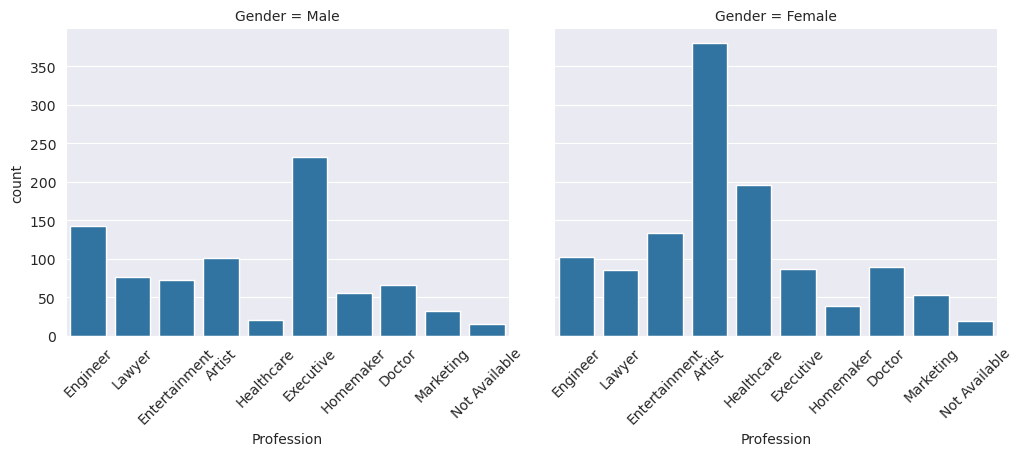

In [50]:
# created the facet object
g= sb.FacetGrid(data=df_customer, col= 'Gender', height=4,aspect=1.3, margin_titles= True);
g.map(sb.countplot, 'Profession'); #mapping the countplot function
g.set_titles('{col_name}'); #setting title
g.set_xticklabels(rotation=45); #Adjusting the x axis label

* For males the three major professions are Executive, Engineer and Artist
* For females the three major professions are Artist,Healthcare and Entertainment.


### Questions for analyses
* Does Gender have any effect on Average Spending score?
* Which Profession earns more and do they spend more?
* Which age range spends more in the retail shop?
* Are there income disparity between the Genders?

#### 1. Does Work Eperience have any effect on Average Spending score?

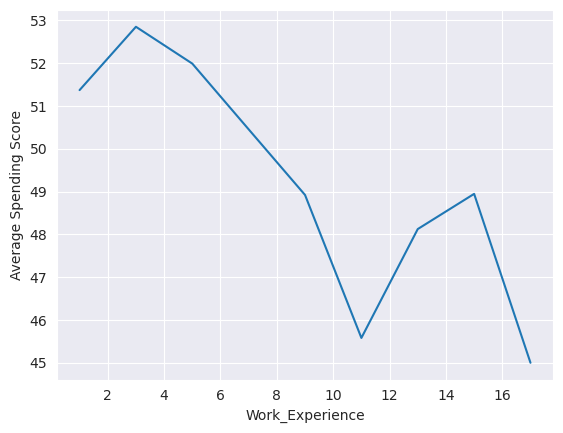

In [51]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0, 17+2, 2)
bin_centers = bin_edges[:-1] + 1

Work_binned = pd.cut(df_customer['Work_Experience'], bin_edges, include_lowest = True)

# For the points in each bin, we compute the mean and standard error of the mean.
Spending_mean = df_customer['Spending_Score'].groupby(Work_binned).mean()
Spending_std = df_customer['Spending_Score'].groupby(Work_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=Spending_mean)
plt.xlabel('Work_Experience')
plt.ylabel('Average Spending Score');

* Those with  work experience between 2 and 10 years has a declining spending score.
* The 11- 15 yrs of experience has an increasing spending score and then decreasing spending score.

#### 2. Which Profession earns more ?

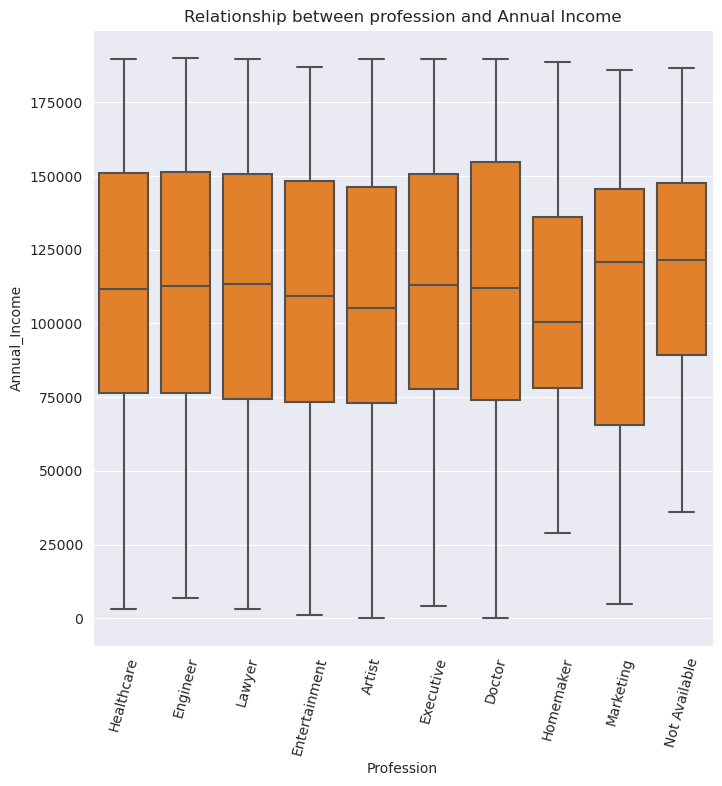

In [55]:
plt.figure(figsize=(8,8));
# plotting boxplot
sb.boxplot(data= df_customer, x= 'Profession',y= 'Annual_Income',color= sb.color_palette()[1]);
plt.title('Relationship between profession and Annual Income');# setting up the title
plt.xticks(rotation=75);

* All the professions has almost the same maximum values of annual income.
* Healthcare, Engineer Executive Artist and Lawyer has almost the same median maximum and least values of annual income.
* The marketing has the highest income range and highest median value

#### 3. Which age range spends more on the average in the retail shop?

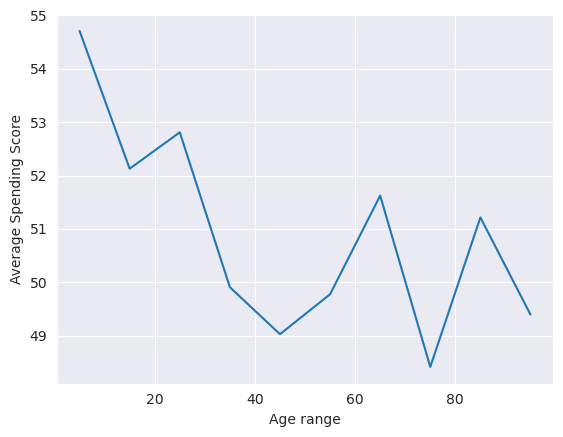

In [53]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0, 99+10, 10)
bin_centers = bin_edges[:-1] + 5

Age_binned = pd.cut(df_customer['Age'], bin_edges, include_lowest = True)

# For the points in each bin, we compute the mean and standard error of the mean.
Spending_mean = df_customer['Spending_Score'].groupby(Age_binned).mean()
Spending_std = df_customer['Spending_Score'].groupby(Age_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=Spending_mean)
plt.xlabel('Age range');
plt.ylabel('Average Spending Score');

* The ages 0-40 spends more as can be seen in the decline as we move along the ages. Although there is an irregular spending pattern between 60 and above.

 #### 4. Are there income disparity between the Genders?

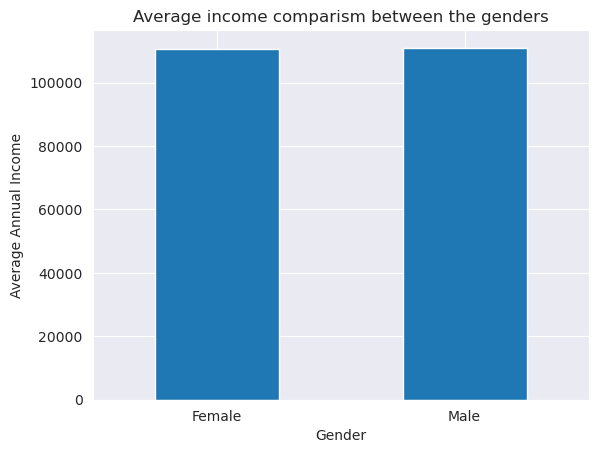

In [54]:
#grouping the data frame by gender and aggregating by mean then plotting a bar plot
df_customer.groupby('Gender').mean()['Annual_Income'].plot(kind= 'bar');
plt.title('Average income comparism between the genders');
plt.xlabel('Gender');
plt.ylabel('Average Annual Income');
plt.xticks(rotation=360);

* There is significant difference in the annual incomes based on gender.

### Summary

The data set customer.csv typicallly reflects to a reasonable extent certain customer behaviours relative to the retail store. The analyses revealed some helpful details namely. There is no income disparity between the selected gender.
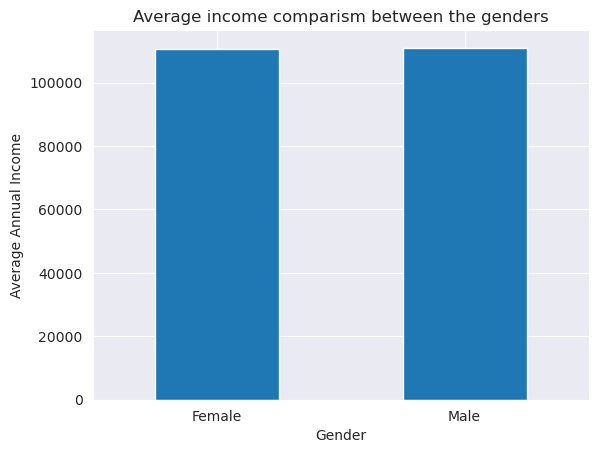


* There is no direct correlation between the age and average annual income. However, we oberve a significant pattern as we move through the age ranges.
* There is a steady increase in average annual income from 20yrs to 60, where there is a slightly steady average.
* For males the three major professions are Executive, Engineer and Artist
* For females the three major professions are Artist,Healthcare and Entertainment.
* Those with  work experience between 2 and 10 years has a declining spending score.
* The 11- 15 yrs of experience has an increasing spending score and then decreasing spending score.

### Ideas on furture work
* Going forward I suggest that more variables like products and date of purchase might assist in noting more factors that affect spending.


### Links